In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd

# Read the CSV file using Pandas
df = pd.read_csv("/content/drive/MyDrive/dataset/video_game_sales.csv", encoding="cp1252", on_bad_lines='skip')

df.head()

Mounted at /content/drive


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Handling/Dropping the missing values
df = df.dropna()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding categorical features
label_encoder = LabelEncoder()

df['Platform'] = label_encoder.fit_transform(df['Platform'])
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Publisher'] = label_encoder.fit_transform(df['Publisher'])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizing sales data
scaler = StandardScaler()
sales_data = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
scaled_sales_data = scaler.fit_transform(sales_data)

# Add the scaled sales data back to the original dataset
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] = scaled_sales_data

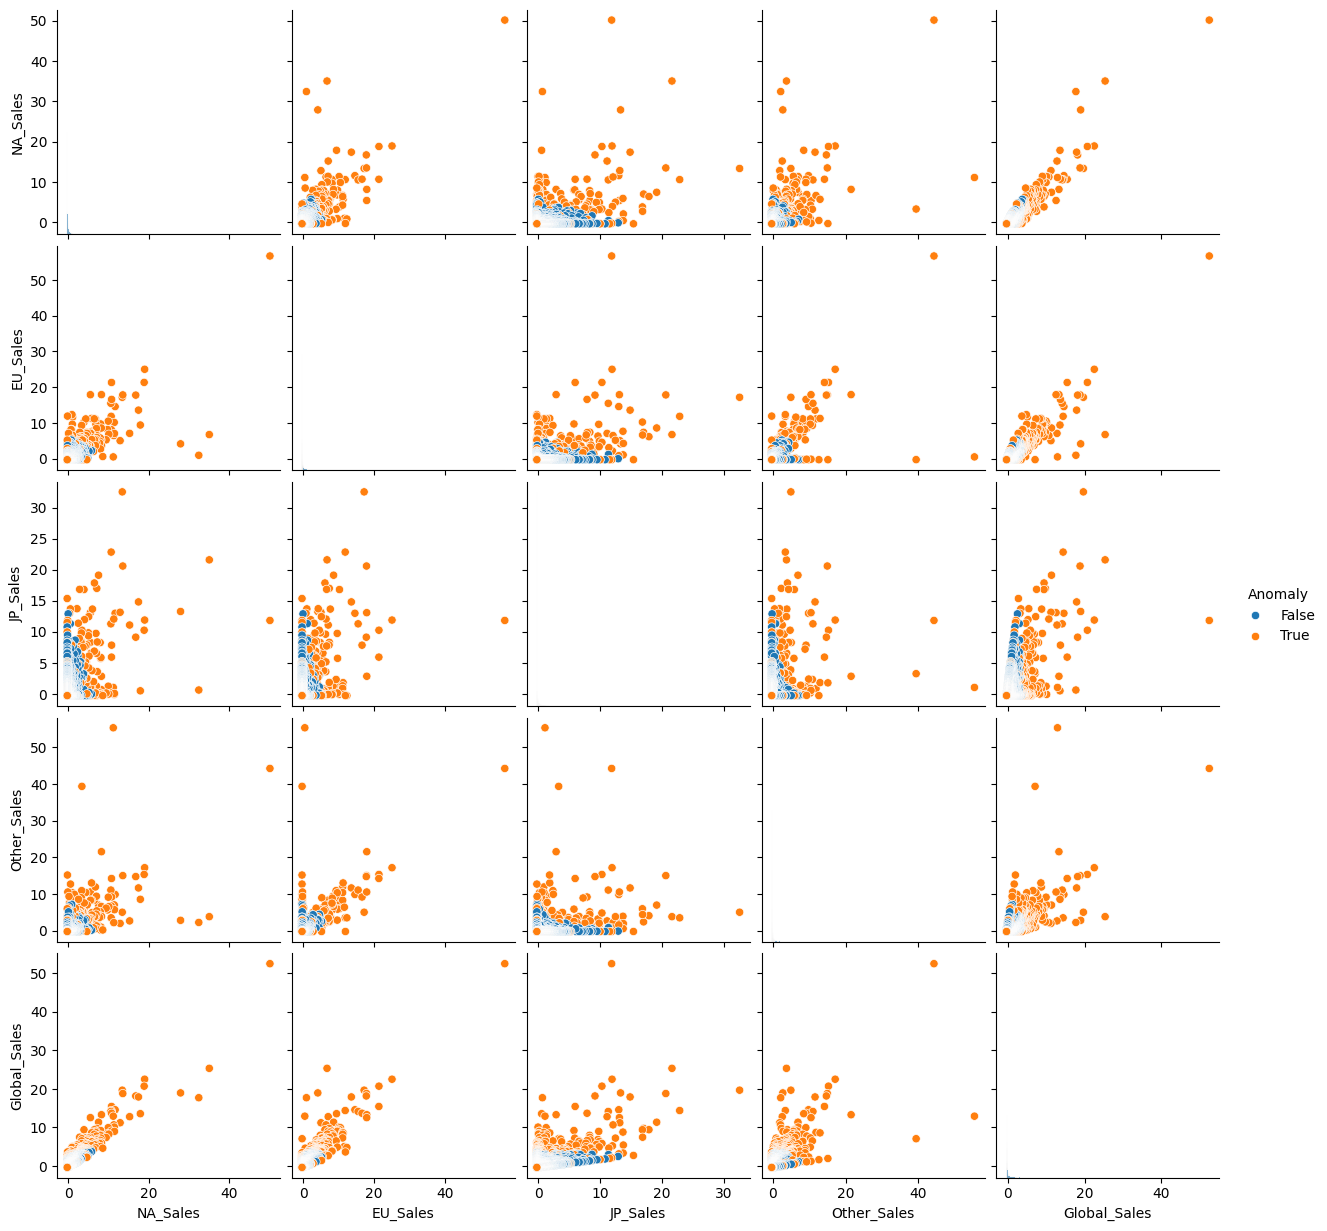

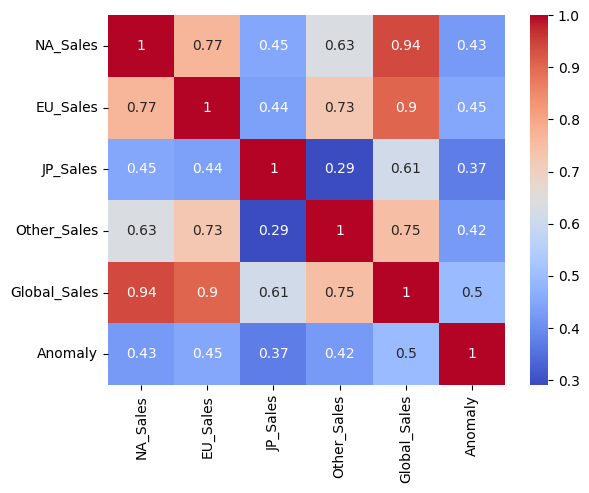

In [ ]:
# Importing seaborn and matplotlib for EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Importing IsolationForest and OneClassSVM for anomaly detection
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Model training: Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['anomaly_iso_forest'] = iso_forest.fit_predict(scaled_sales_data)

# Model training: One-Class SVM
oc_svm = OneClassSVM(nu=0.01, kernel="rbf", gamma='scale')
df['anomaly_oc_svm'] = oc_svm.fit_predict(scaled_sales_data)

# Adding Anomaly column
df['Anomaly'] = (df['anomaly_iso_forest'] == -1) | (df['anomaly_oc_svm'] == -1)

# Convert anomaly column to boolean
df['Anomaly'] = df['Anomaly'].astype(bool)

# EDA: Visualizing the distribution of sales data
sns.pairplot(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Anomaly']], hue='Anomaly', diag_kind='hist')
plt.show()

# Displaying correlation matrix
correlation_matrix = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Anomaly']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Analyzing anomalies
anomalies = df[df['Anomaly']]
non_anomalies = df[~df['Anomaly']]

In [ ]:
# Summary of anomalies
print(f'Number of anomalies detected: {len(anomalies)}')
print(f'Number of non-anomalies: {len(non_anomalies)}')

# Display a sample of the detected anomalies
anomalies.head()

Number of anomalies detected: 356
Number of non-anomalies: 15935


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,anomaly_iso_forest,anomaly_oc_svm,Anomaly
0,1,Wii Sports,26,2006.0,10,359,50.126469,56.691515,11.835597,44.253501,52.446423,-1,-1,True
1,2,Super Mario Bros.,11,1985.0,4,359,35.036615,6.739357,21.583251,3.796218,25.329663,-1,-1,True
2,3,Mario Kart Wii,26,2008.0,6,359,18.949687,25.000169,11.899727,17.159222,22.509520,-1,-1,True
3,4,Wii Sports Resort,26,2009.0,10,359,18.828093,21.328372,10.264430,15.317863,20.710243,-1,-1,True
4,5,Pokemon Red/Pokemon Blue,5,1996.0,7,359,13.380668,17.165692,32.517296,5.006254,19.670236,-1,-1,True
